<a href="https://colab.research.google.com/github/theredditbandit/learning-deep-learning/blob/master/not_hotdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai duckduckgo_search

# Imports

In [ ]:
from duckduckgo_search import ddg_images, DDGS
from fastcore.all import *

from fastdownload import download_url
from fastai.vision.all import *

from time import sleep

## Search

In [ ]:
def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    # return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return L(DDGS().images(term,max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('hotdog photos', max_images=15)
# print(urls)
urls[0]

# Download Images

In [ ]:
dest = 'hotdog.jpg'
download_url(urls[0],dest,show_progress=True)
im = Image.open(dest)
im.to_thumb(256,256)

Let us download some non hotdog photos

In [ ]:
download_url(search_images('spaghetti photos', max_images=5)[0], 'spaghetti.jpg', show_progress=False)
Image.open('spaghetti.jpg').to_thumb(256,256)

In [ ]:
items = ['spaghetti on a table','hotdog on a table','doughnut on a table','pizza on a table','cheese cake on a table','burger on a table']
for item in items:
    download_url(search_images(f'{item} photos', max_images=5)[0], f'{item}.jpg', show_progress=False)

Searching for 'spaghetti on a table photos'
Searching for 'hotdog on a table photos'
Searching for 'doughnut on a table photos'
Searching for 'pizza on a table photos'
Searching for 'cheese cake on a table photos'
Searching for 'burger on a table photos'


In [ ]:
item = 'spaghetti'
download_url(search_images(f'{item} photos', max_images=5)[0], f'{item}.jpg', show_progress=False)

In [ ]:
searches = 'spaghetti','hotdog','doughnut','pizza','cheese cake','burger'
path = Path('hotdog_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photo'))
    resize_images(path/o,max_size=400,dest=path/o)

Searching for 'spaghetti photo'
Searching for 'spaghetti on table'
Searching for 'hotdog photo'
Searching for 'hotdog on table'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'doughnut photo'
Searching for 'doughnut on table'
Searching for 'pizza photo'
Searching for 'pizza on table'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'cheese cake photo'
Searching for 'cheese cake on table'
Searching for 'burger photo'
Searching for 'burger on table'


# Training the model

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

59

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


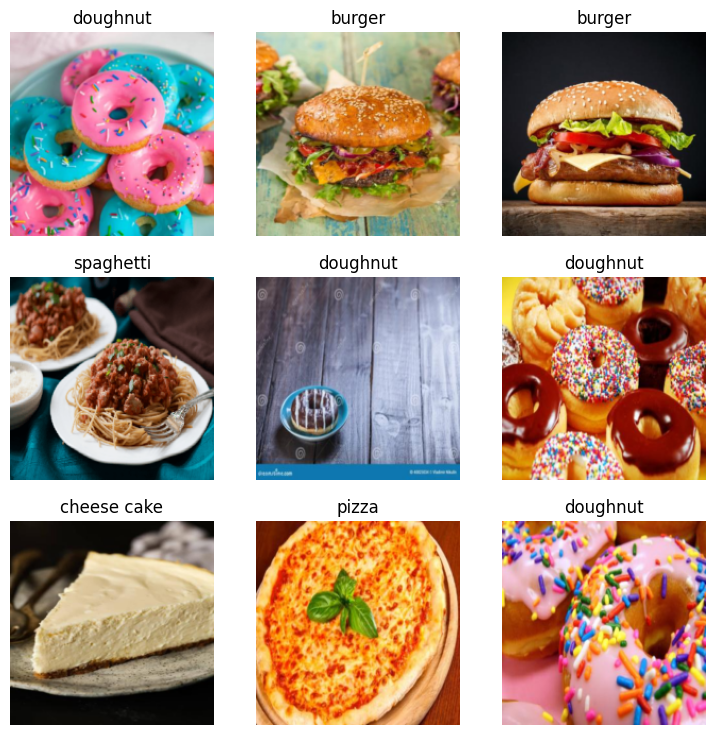

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n = 9)

In [ ]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.559593,0.382138,0.146119,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.385598,0.319967,0.100457,03:07
1,0.240583,0.271600,0.082192,03:03
2,0.153402,0.211766,0.077626,03:00
3,0.096579,0.207501,0.073059,03:00
4,0.066623,0.243123,0.073059,03:00
5,0.053764,0.287315,0.073059,03:00
6,0.043557,0.281141,0.073059,03:01
7,0.028526,0.277399,0.073059,02:59
8,0.020728,0.293834,0.073059,03:00
9,0.017255,0.288648,0.068493,03:00


# Prediction

This is a pizza
Probability it's a pizza: 0.000001


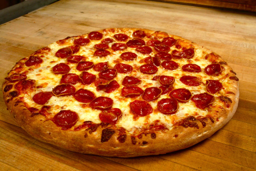

In [106]:
item = 'pizza.jpg'
# item = 'hotdog.jpg'
pred , _ , probs = learn.predict(PILImage.create(item))
print(f"This is a {pred}")
print(f"Probability it's a {pred}: {probs[0]:.6f}")

Image.open(item).to_thumb(256,256)